In [1]:
import pandas as pd
import numpy as np

In [2]:
base_path = "../nanodiag_datasets/GSE175758/"

In [ ]:
df_merged_signals = pd.read_csv(base_path + "merged_signals.csv", sep="\t")
df_merged_signals

In [5]:
#df_merged_signals_features = df_merged_signals[df_merged_signals.columns[1:]]
#df_merged_signals_features

In [6]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
labels = df_merged_signals["treatment_label"]
features = df_merged_signals.drop(columns=["treatment_label"])

n_out_features = 100

reduced_features = SelectKBest(f_classif, k=n_out_features).fit_transform(features, labels)

In [ ]:
reduced_features.shape

In [ ]:
import umap
import umap.plot

# n_neighbors
# min_dist
# n_components
# metric

mapper = umap.UMAP().fit(reduced_features) #n_neighbors=7
umap.plot.points(mapper, labels=labels)

In [ ]:
model_selectkfeatures = SelectKBest(f_classif, k=n_out_features).fit(features, labels)
#dir(model_selectkfeatures)

In [ ]:
model_selectkfeatures.get_feature_names_out()

In [12]:
#model_selectkfeatures.feature_names_in_, len(model_selectkfeatures.feature_names_in_)

In [ ]:
from sklearn.model_selection import train_test_split

n_out_features = 100
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model_selectkfeatures_train = SelectKBest(f_classif, k=n_out_features).fit(X_train, y_train)
model_selectkfeatures_train.get_feature_names_out()

In [ ]:
test_transformed_features = model_selectkfeatures_train.transform(X_test)
test_transformed_features.shape

In [ ]:
clf_xgb_selected = make_pipeline(
    SelectKBest(f_classif, k=n_out_features), MinMaxScaler(), XGBClassifier()
)

clf_xgb_selected.fit(X_train, y_train)
print(
    "Classification accuracy after univariate feature selection using XGB: {:.3f}".format(
        clf_selected.score(X_test, y_test)
    )
)

In [ ]:
dir(clf_xgb_selected)

In [ ]:
x_test_transformed = clf_xgb_selected[:-1].transform(X_test)
x_test_transformed.shape

In [ ]:
y_score = clf_xgb_selected[2].predict_proba(x_test_transformed)
y_score

In [ ]:
from sklearn.metrics import precision_recall_curve, RocCurveDisplay, roc_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def plot_precision_recall_curve(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    area = auc(recall, precision)
    
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve (AUC = %0.2f)' % area)
    plt.show()
plot_precision_recall_curve(y_test, y_score[:, 1])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_auc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
# y_true = true labels
# y_scores = predicted scores or probabilities for the positive class
plot_roc_auc_curve(y_test, y_score[:, 1])

Classification accuracy after univariate feature selection using XGB: 0.920


['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_can_fit_transform',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_parameter_constraints',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_m

array([[0.68284106, 0.3171589 ],
       [0.10685009, 0.8931499 ],
       [0.2559796 , 0.7440204 ],
       [0.76609695, 0.23390307],
       [0.85783166, 0.14216834],
       [0.7706917 , 0.2293083 ],
       [0.19771713, 0.80228287],
       [0.665138  , 0.334862  ],
       [0.5110365 , 0.4889635 ],
       [0.9319995 , 0.06800047],
       [0.90402424, 0.09597573],
       [0.95098937, 0.04901062],
       [0.90402424, 0.09597573],
       [0.90402424, 0.09597573],
       [0.27782875, 0.72217125],
       [0.95098937, 0.04901062],
       [0.74548805, 0.25451195],
       [0.95098937, 0.04901062],
       [0.90402424, 0.09597573],
       [0.6895437 , 0.3104563 ],
       [0.6107195 , 0.3892805 ],
       [0.5110365 , 0.4889635 ],
       [0.2510934 , 0.7489066 ],
       [0.51881135, 0.48118865],
       [0.85783166, 0.14216834]], dtype=float32)

array([[0.68284106, 0.3171589 ],
       [0.10685009, 0.8931499 ],
       [0.2559796 , 0.7440204 ],
       [0.76609695, 0.23390307],
       [0.85783166, 0.14216834],
       [0.7706917 , 0.2293083 ],
       [0.19771713, 0.80228287],
       [0.665138  , 0.334862  ],
       [0.5110365 , 0.4889635 ],
       [0.9319995 , 0.06800047],
       [0.90402424, 0.09597573],
       [0.95098937, 0.04901062],
       [0.90402424, 0.09597573],
       [0.90402424, 0.09597573],
       [0.27782875, 0.72217125],
       [0.95098937, 0.04901062],
       [0.74548805, 0.25451195],
       [0.95098937, 0.04901062],
       [0.90402424, 0.09597573],
       [0.6895437 , 0.3104563 ],
       [0.6107195 , 0.3892805 ],
       [0.5110365 , 0.4889635 ],
       [0.2510934 , 0.7489066 ],
       [0.51881135, 0.48118865],
       [0.85783166, 0.14216834]], dtype=float32)

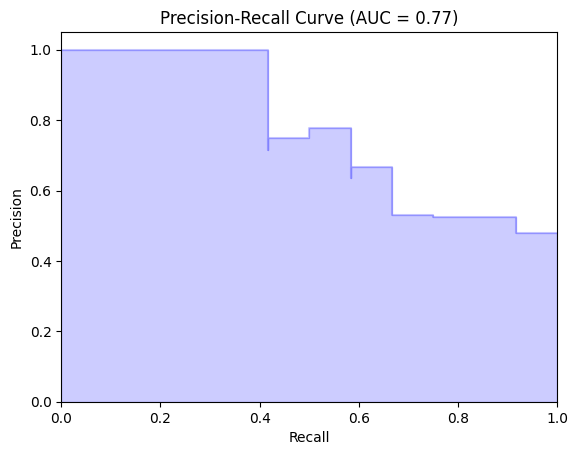

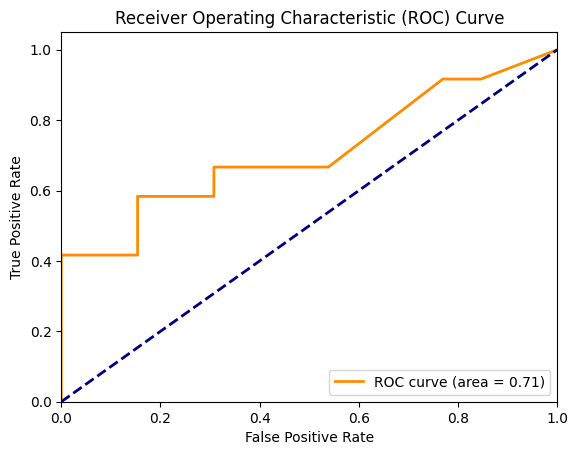